# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt 
import copy as cp

# Functions 

In [2]:
def add_transportCnt( date : list[dt.datetime], comeIn : list[int] ) -> None : 
    # Given two list, one is the date, the other is the people into every train station
    # The data type of date should be list of datetime.datetime
    # The data type of come into station people should be list of int 

    # transportCnt is global variable 
    global transportCnt 

    # Traverse every data, add comeIn value to that day 
    for i in range( len( date ) ) :
        currentDate = date[i]
        try : 
            transportCnt[currentDate] += comeIn[i]
        except : 
            transportCnt[currentDate] = comeIn[i]

In [3]:
def convert_date( datesList : list[int] ) -> list[dt.datetime] :
    # Given a list of date, with format : yyyymmdd
    # Convert the list into date with type of datetime.datetime

    tempDatesList = cp.deepcopy( datesList )

    for i in range( len( tempDatesList ) ) : 
        currentDateStr = str( tempDatesList[i] )
        year = int( currentDateStr[:4] )
        month = int( currentDateStr[4:6] )
        day = int( currentDateStr[6:8] )
        tempDatesList[i] = dt.datetime( year, month, day )
    return tempDatesList 

# Main dictionary

In [4]:
transportCnt = dict()

# Read data

In [5]:
df_2005_to_2007 = pd.read_csv( '2005-20190422/2005-2017.csv')
df_2018 = pd.read_csv( '2005-20190422/2018.csv')
df_2019_1 = pd.read_csv( '2005-20190422/20190422.csv')
df_2019_2 = pd.read_csv( '20190423-20211231/20190423-20191231.csv')
df_2020 = pd.read_csv( '20190423-20211231/2020.csv')
df_2021 = pd.read_csv( '20190423-20211231/2021.csv' )
df_2022 = pd.read_csv( '2022.csv' ) 

In [6]:
date_2005_to_2017 = df_2005_to_2007['BOARD_DATE']
comeIn_2005_to_2017 = df_2005_to_2007['進站']

date_2018 = df_2018['BOARD_DATE']
comeIn_2018 = df_2018['進站']

date_2019_1 = df_2019_1['BOARD_DATE']
comeIn_2019_1 = df_2019_1['進站']

date_2019_2 = df_2019_2['trnOpDate']
comeIn_2019_2 = df_2019_2['gateInComingCnt']

date_2020 = df_2020['trnOpDate']
comeIn_2020 = df_2020['gateInComingCnt']

date_2021 = df_2021['trnOpDate']
comeIn_2021 = df_2021['gateInComingCnt']

date_2022 = df_2022['trnOpDate']
comeIn_2022 = df_2022['gateInComingCnt']

In [7]:
datesList = list( date_2005_to_2017 ) 
datesList += list( date_2018 ) 
datesList += list( date_2019_1 ) 
datesList += list( date_2019_2 ) 
datesList += list( date_2020 ) 
datesList += list( date_2021 ) 
datesList += list( date_2022 ) 

In [8]:
comeInsList = list( comeIn_2005_to_2017 )
comeInsList += list( comeIn_2018 ) 
comeInsList += list( comeIn_2019_1 ) 
comeInsList += list( comeIn_2019_2 ) 
comeInsList += list( comeIn_2020 ) 
comeInsList += list( comeIn_2021 ) 
comeInsList += list( comeIn_2022 ) 

# Write into main dictionary 

In [9]:
datesList = convert_date( datesList ) 

In [10]:
add_transportCnt( datesList, comeInsList )

In [11]:
len( transportCnt )

6330

In [12]:
transportCnt[dt.datetime( 2007, 12,30 )]

491635

In [34]:
datas = transportCnt.values()

In [35]:
type( datas )

dict_values

In [39]:
data = []
for i in datas : 
    data.append( float( i ) )

In [40]:
data = np.array( data )

In [41]:
data -= np.mean( data )

In [44]:
import scipy.stats as stats 

In [45]:
stats.shapiro( data )

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9835575819015503, pvalue=1.728734285530218e-26)

In [46]:
import statsmodels.api as sm

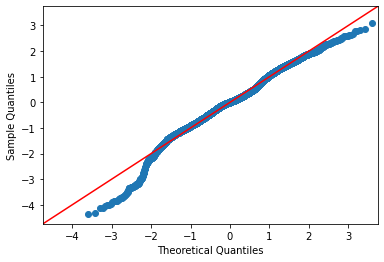

In [47]:
fig = sm.qqplot( data, stats.norm, fit=True, line = '45' ) 